 # Breast Cancer Binary Classification
**ABOUT PROJECT**

The aim of this project is to study Cambra breast cancer and using Deep Learning creating a model that classifies patients as either 
having breast cancer or not

**Method of Approach**
* Data Analysis 
* Feature Engineering
* Deep Learning(Pytorch)


In [1]:
#importing the necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch
from torch import nn,optim
import torch.nn.functional as F
import torchmetrics 
%matplotlib inline

In [2]:
# reading in the data 
df = pd.read_csv("C:\\Users\\EDGAR MUYALE DAVIES\\Downloads\\Coimbra_breast_cancer_dataset.csv")
df.head(10)

Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   54  35.207389      103    5.642  1.378660  65.6699     9.738408  31.17499   
1   52  22.978520      132    6.054  1.145435  47.5445     3.627241  23.03327   
2   32  21.101341       87    5.668  1.008595  50.5074     5.067841   9.51156   
3   42  26.761205      132    2.875  1.003837  16.8972    10.096475   9.75652   
4   55  34.232520       76    3.120  1.597721  17.6852    11.845054  17.21541   
5   47  26.643220      136    3.375  4.516214  29.4842    10.356278   5.59087   
6   32  20.950698      134    4.174  1.094998  10.3516    15.931240   5.28237   
7   53  23.788202      131    4.718  1.305201  18.5883     6.694044  15.77810   
8   57  32.469138       76    4.407  0.798422  31.6023     7.929650   4.51991   
9   83  29.149505       76    4.216  1.440923  15.1333     8.588777   6.91304   

     MCP.1  Classification  
0  197.660               1  
1  423.361               2  
2  897.034               2  
3  267.744               1  
4  788.552               2  
5  354.180               1  
6  331.533               2  
7  415.305               1  
8  585.515               2  
9  209.636               1

In [3]:
df['Classification'] = df['Classification']-1

In [4]:
df['Classification'].head(10)

0    0
1    1
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    0
Name: Classification, dtype: int64

In [5]:
# checking the shape
df.shape

(4000, 10)

In [6]:
# Checking if we have null values 
df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [7]:
df.describe() # Basic statistical information 

Age          BMI      Glucose      Insulin         HOMA  \
count  4000.00000  4000.000000  4000.000000  4000.000000  4000.000000   
mean     56.21075    27.422280   113.876500     8.654001     2.024332   
std      17.80965     4.413884    25.837795     6.435160     1.625638   
min      32.00000    20.690751    76.000000     2.821000     0.590033   
25%      39.00000    23.079053    76.000000     4.421750     0.970090   
50%      56.00000    27.558485   131.000000     5.818000     1.373842   
75%      72.00000    30.814916   134.000000    10.466250     2.502776   
max      85.00000    36.209606   138.000000    30.211000     8.218456   

            Leptin  Adiponectin     Resistin        MCP.1  Classification  
count  4000.000000  4000.000000  4000.000000  4000.000000     4000.000000  
mean     25.137737     9.364896    13.053667   512.183456        0.554000  
std      15.096446     4.674244     7.454424   253.279015        0.497138  
min       6.831900     3.192272     4.190320   137.488000        0.000000  
25%      12.712750     5.580210     7.022095   299.665000        0.000000  
50%      19.805050     8.286938    10.692780   482.308000        1.000000  
75%      36.670250    10.918292    17.294747   691.312500        1.000000  
max      68.506600    22.536919    42.617810  1227.250000        1.000000

In [8]:
df.corr() # checking for correlation

Age       BMI   Glucose   Insulin      HOMA    Leptin  \
Age             1.000000  0.019139  0.002611  0.000742  0.024631  0.005058   
BMI             0.019139  1.000000 -0.014469  0.011574  0.012795 -0.011482   
Glucose         0.002611 -0.014469  1.000000  0.000558 -0.018232 -0.006461   
Insulin         0.000742  0.011574  0.000558  1.000000 -0.013142  0.005678   
HOMA            0.024631  0.012795 -0.018232 -0.013142  1.000000  0.006751   
Leptin          0.005058 -0.011482 -0.006461  0.005678  0.006751  1.000000   
Adiponectin    -0.013493 -0.002348  0.016363 -0.014560  0.003433  0.024054   
Resistin       -0.013438  0.005303  0.014179  0.036136  0.000272  0.014217   
MCP.1          -0.019410 -0.023389  0.001837 -0.011382  0.009965 -0.003359   
Classification -0.007965 -0.009352 -0.004893 -0.016826 -0.012441 -0.004914   

                Adiponectin  Resistin     MCP.1  Classification  
Age               -0.013493 -0.013438 -0.019410       -0.007965  
BMI               -0.002348  0.005303 -0.023389       -0.009352  
Glucose            0.016363  0.014179  0.001837       -0.004893  
Insulin           -0.014560  0.036136 -0.011382       -0.016826  
HOMA               0.003433  0.000272  0.009965       -0.012441  
Leptin             0.024054  0.014217 -0.003359       -0.004914  
Adiponectin        1.000000 -0.018945 -0.018323       -0.007499  
Resistin          -0.018945  1.000000 -0.007602        0.026235  
MCP.1             -0.018323 -0.007602  1.000000        0.006002  
Classification    -0.007499  0.026235  0.006002        1.000000

In [9]:
# checking for most frequent items in each columns 
# I will create a function that returns the most frequently appearing items
def most_frequent(column:str,df=df):
    """This Function returns unique elements in a column 
    The function returns also the most frequent elements by columns 
    Args :
    df - pd.Dataframe(),the dataframe that we are studying
    column - Column
    
    Returns :
    Total number of unique elements 
    Top 10 frequent elements in our datafrane 
    
    """
    print(f"There are {df[column].nunique()}unique elements in {column}")
    print(f"The most appearing element in |{column} \n{df[column].value_counts().head(10)}")

In [10]:
# Using a for loop to study all the columns 

for column in df.columns:
    most_frequent(column)

There are 54unique elements in Age
The most appearing element in |Age 
32    264
33    261
34    259
84    130
81    126
82    123
83    118
67     91
37     77
61     74
Name: Age, dtype: int64
There are 4000unique elements in BMI
The most appearing element in |BMI 
35.207389    1
27.772328    1
28.563337    1
31.521231    1
23.074867    1
23.548910    1
26.666667    1
25.343928    1
28.587964    1
32.494029    1
Name: BMI, dtype: int64
There are 63unique elements in Glucose
The most appearing element in |Glucose 
76     1036
132     344
131     335
135     331
134     330
133     325
137     325
136     298
97       20
81       20
Name: Glucose, dtype: int64
There are 2963unique elements in Insulin
The most appearing element in |Insulin 
4.422    9
4.421    8
4.426    8
4.180    7
4.175    7
4.177    6
3.479    6
3.008    6
5.813    6
4.341    6
Name: Insulin, dtype: int64
There are 4000unique elements in HOMA
The most appearing element in |HOMA 
1.378660    1
1.031730    1
1.768240 

In [11]:
# I will focus on Age ,BMI and Glucose 
for column in df.columns :
    if column in ['Age','BMI','Glucose']:
        most_frequent(column)
    else :
        pass 
# Seems that a lot of patients are aged between 32 and 34, # BMI has all  unique elements 

There are 54unique elements in Age
The most appearing element in |Age 
32    264
33    261
34    259
84    130
81    126
82    123
83    118
67     91
37     77
61     74
Name: Age, dtype: int64
There are 4000unique elements in BMI
The most appearing element in |BMI 
35.207389    1
27.772328    1
28.563337    1
31.521231    1
23.074867    1
23.548910    1
26.666667    1
25.343928    1
28.587964    1
32.494029    1
Name: BMI, dtype: int64
There are 63unique elements in Glucose
The most appearing element in |Glucose 
76     1036
132     344
131     335
135     331
134     330
133     325
137     325
136     298
97       20
81       20
Name: Glucose, dtype: int64


In [12]:
# Seems like Age and Glucose are the best univariate elements to study

# PART 2 : DATA ANALYSIS
**Methods of Approach**
* Pairplot 
* Histogram 
* Jointplot 
* Violin Plot 
* Boxplot 
* Countplots with hues

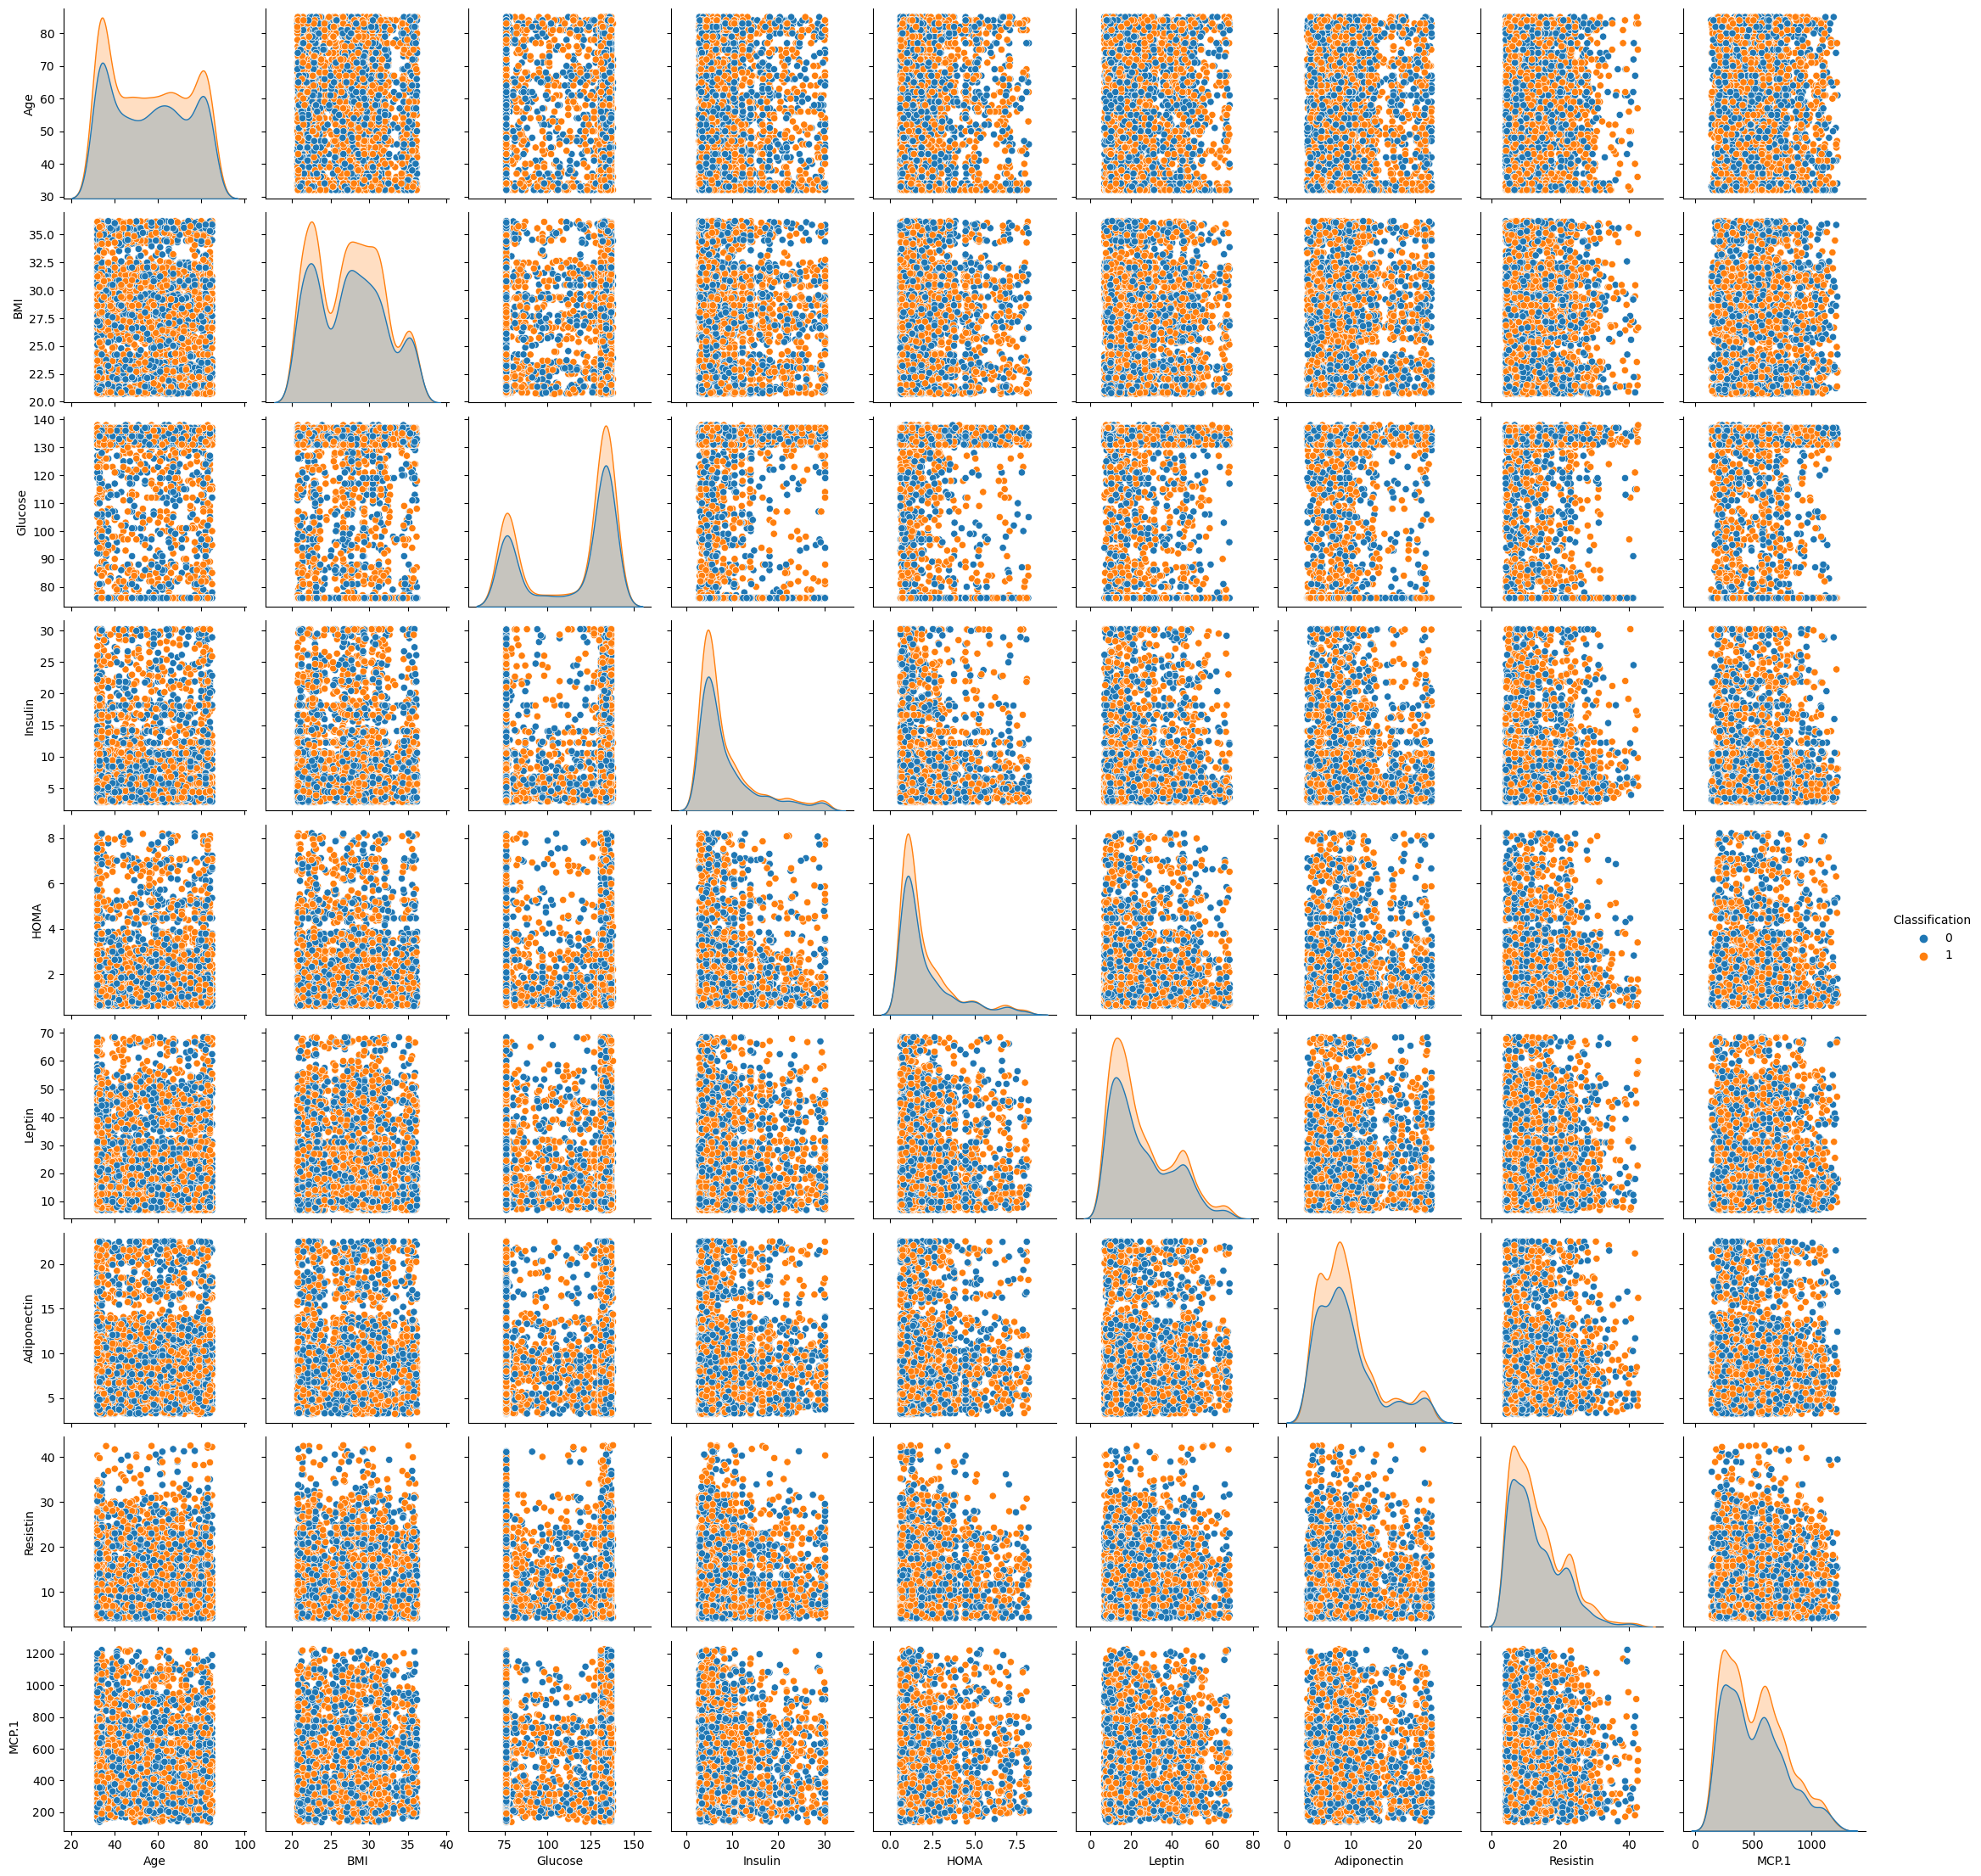

In [13]:
# A pairplot to represent all the variables in our dataset 
sns.pairplot(df,hue='Classification')

In [14]:
# Plotting histogram to illustrate the most frequent appearing elements in our dataset 
def plot_histogram(column:str,kde=None,df=df):
    fig=plt.figure(figsize=(20,8))
    sns.histplot(x=column,kde=kde,data=df)
    plt.xlabel(column)
    plt.ylabel('Total Frequency')
    plt.title(f"Histogram showing the distribution of  : {column}")

Text(0, 0.5, 'Total Frequency')

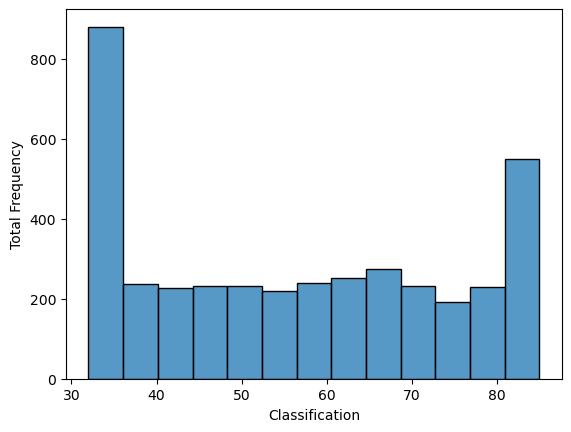

In [15]:
sns.histplot(x='Age',data=df)
plt.xlabel(column)
plt.ylabel('Total Frequency')

In [16]:
df.columns

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')

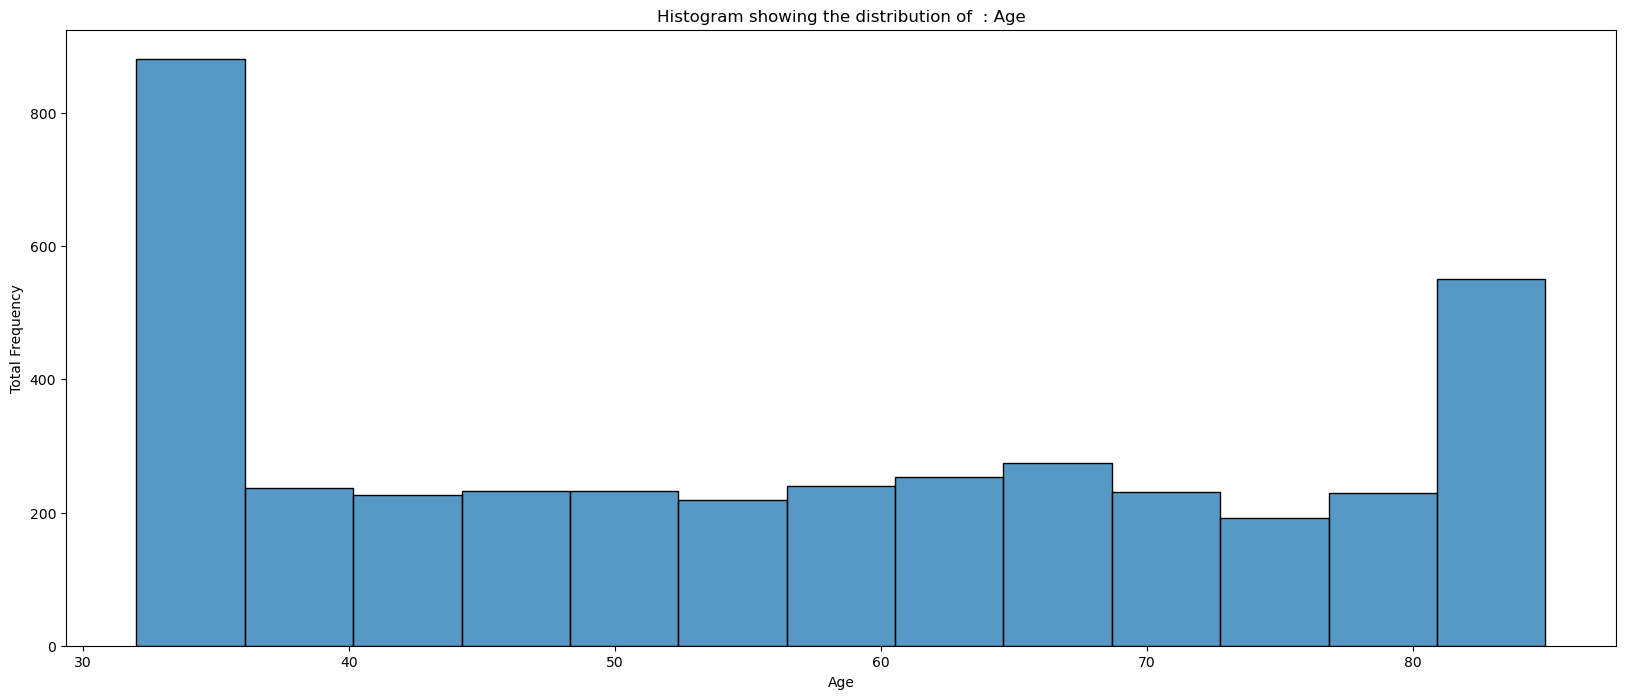

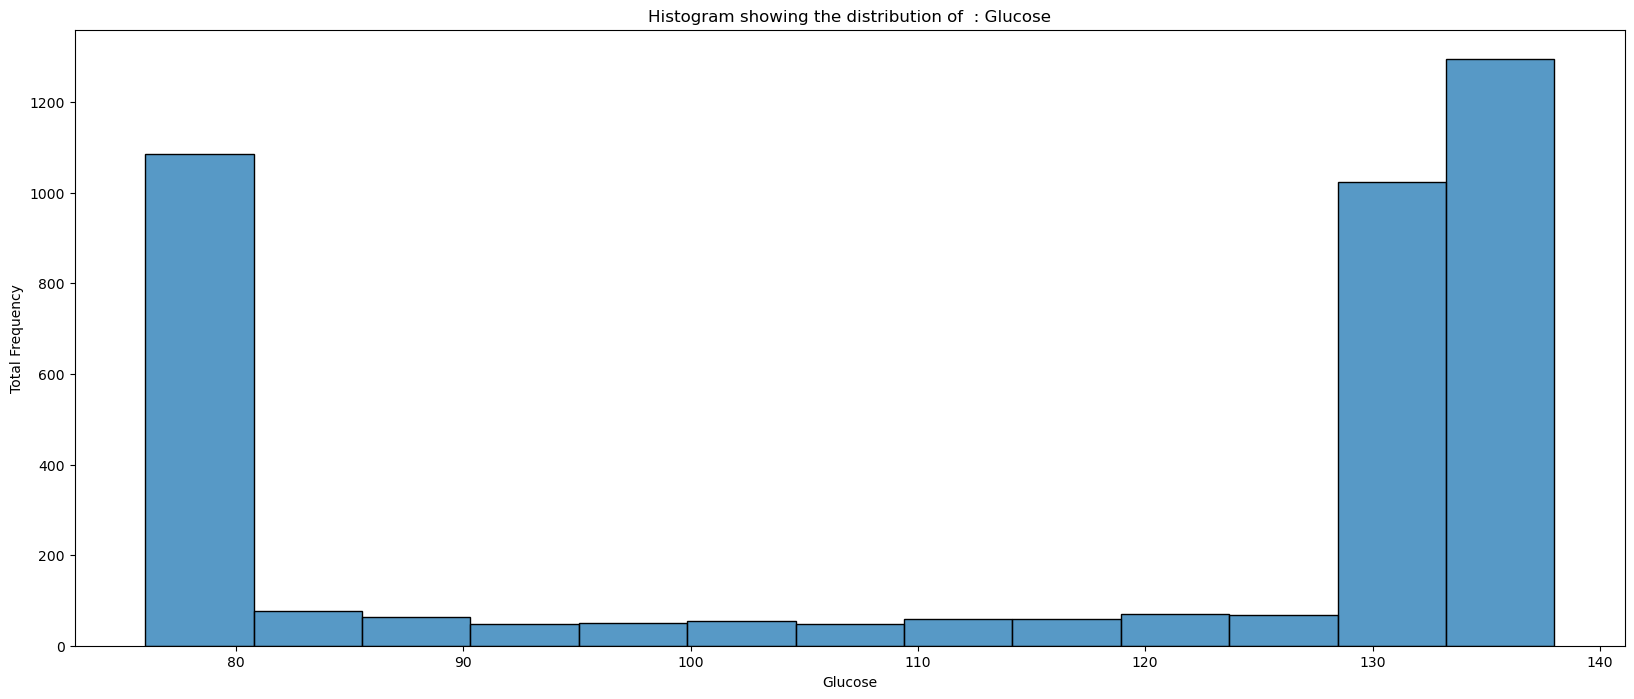

In [17]:
for column in df.columns :
    if column in ['Age','Glucose']:
        plot_histogram(column)
    else :
        pass

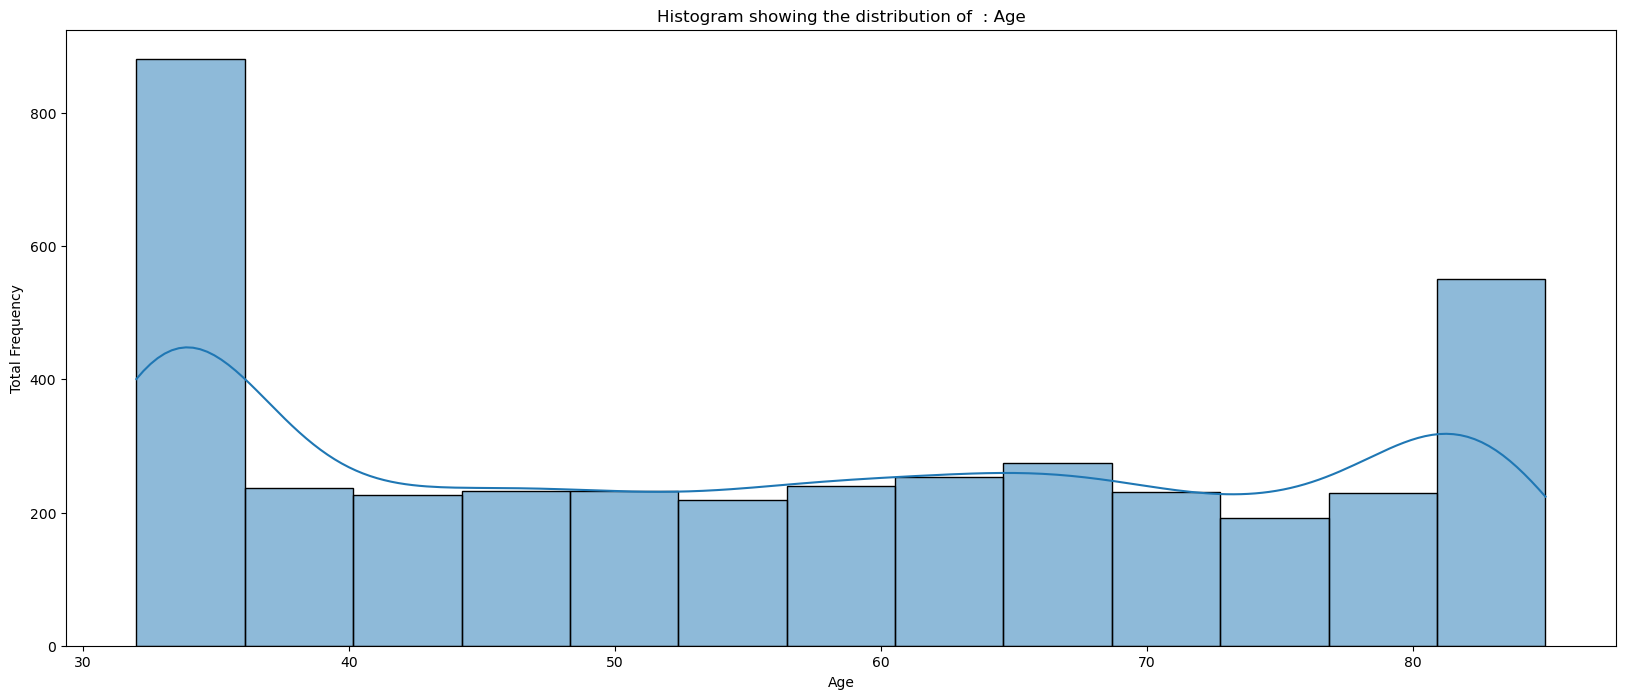

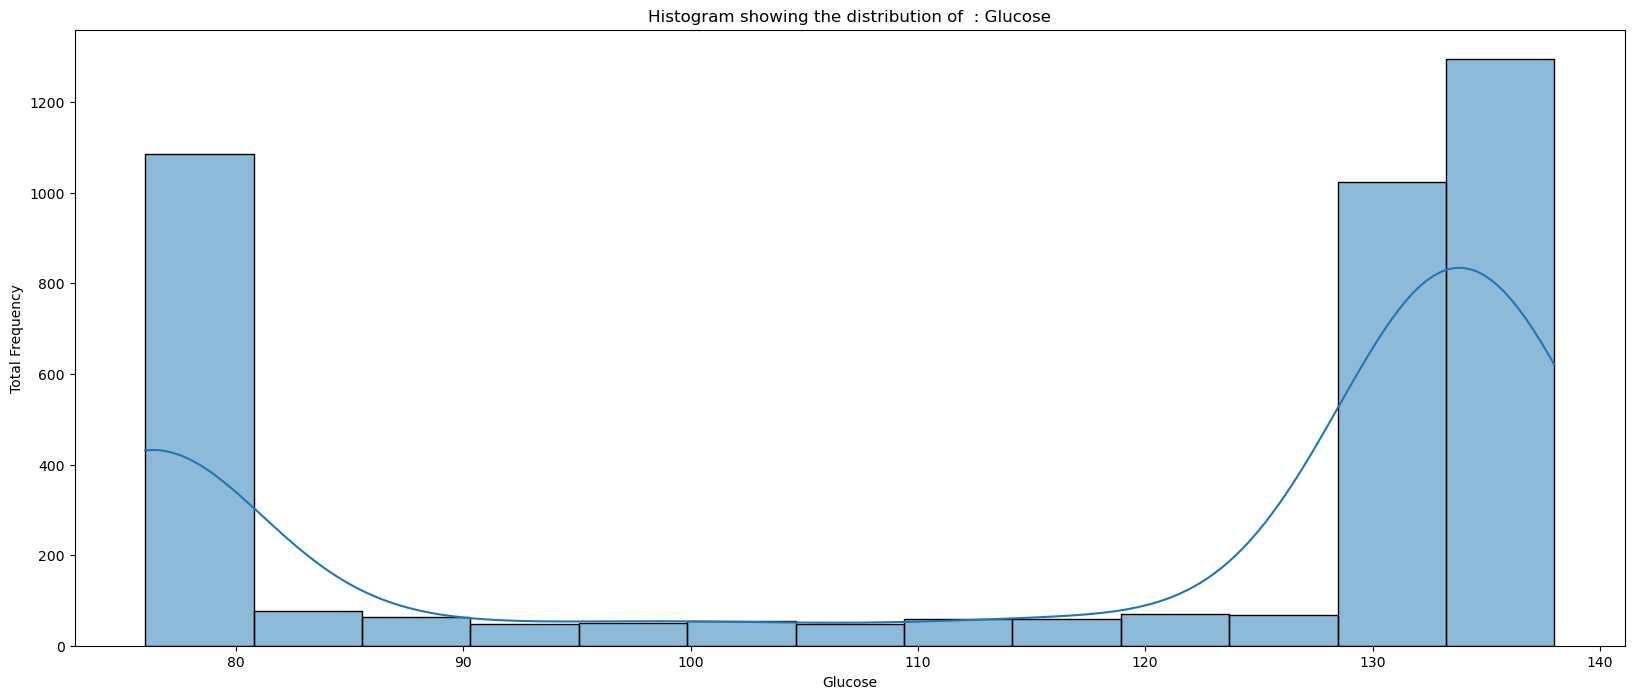

In [18]:
for column in df.columns :
    if column in ['Age','Glucose']:
        plot_histogram(column,kde=True)
    else :
        pass

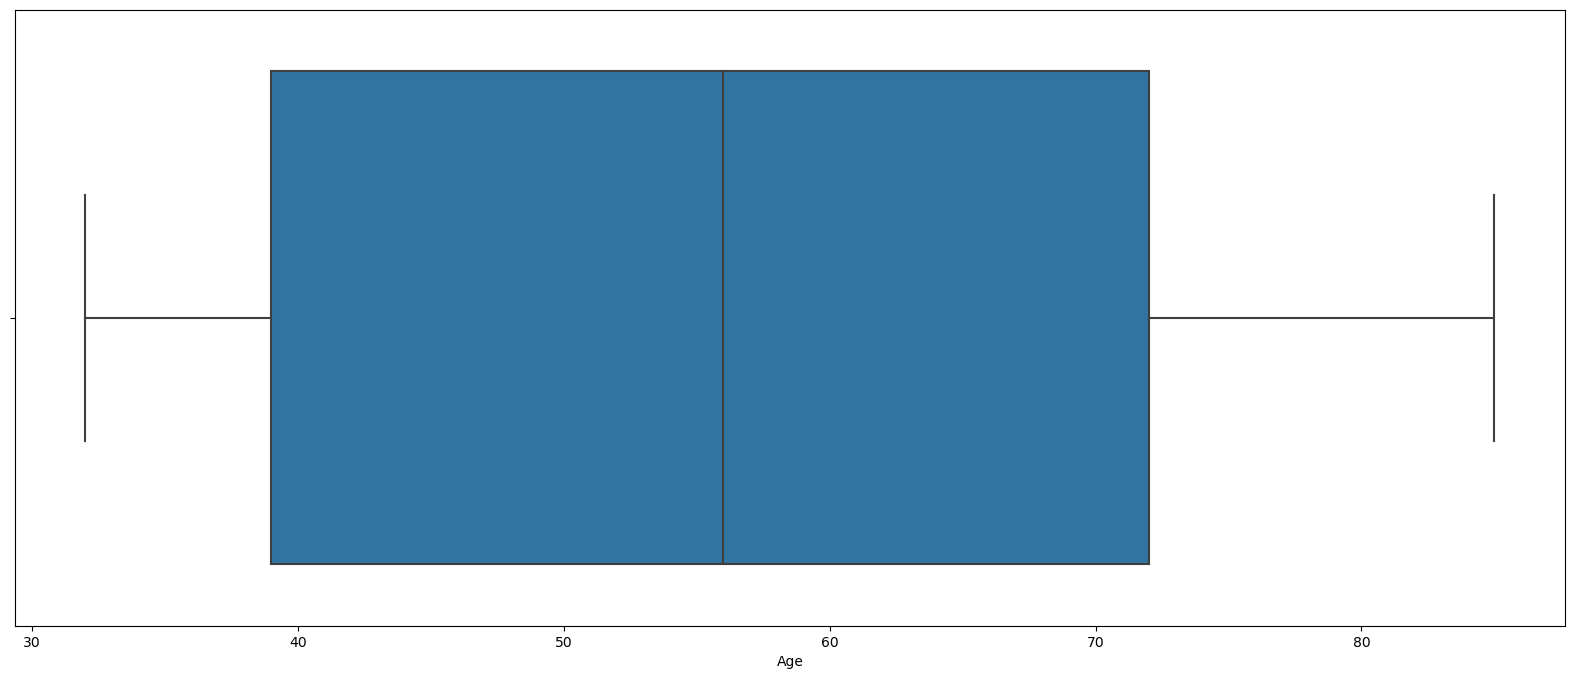

In [19]:
fig=plt.figure(figsize=(20,8))
sns.boxplot(x='Age',data=df)
plt.show()

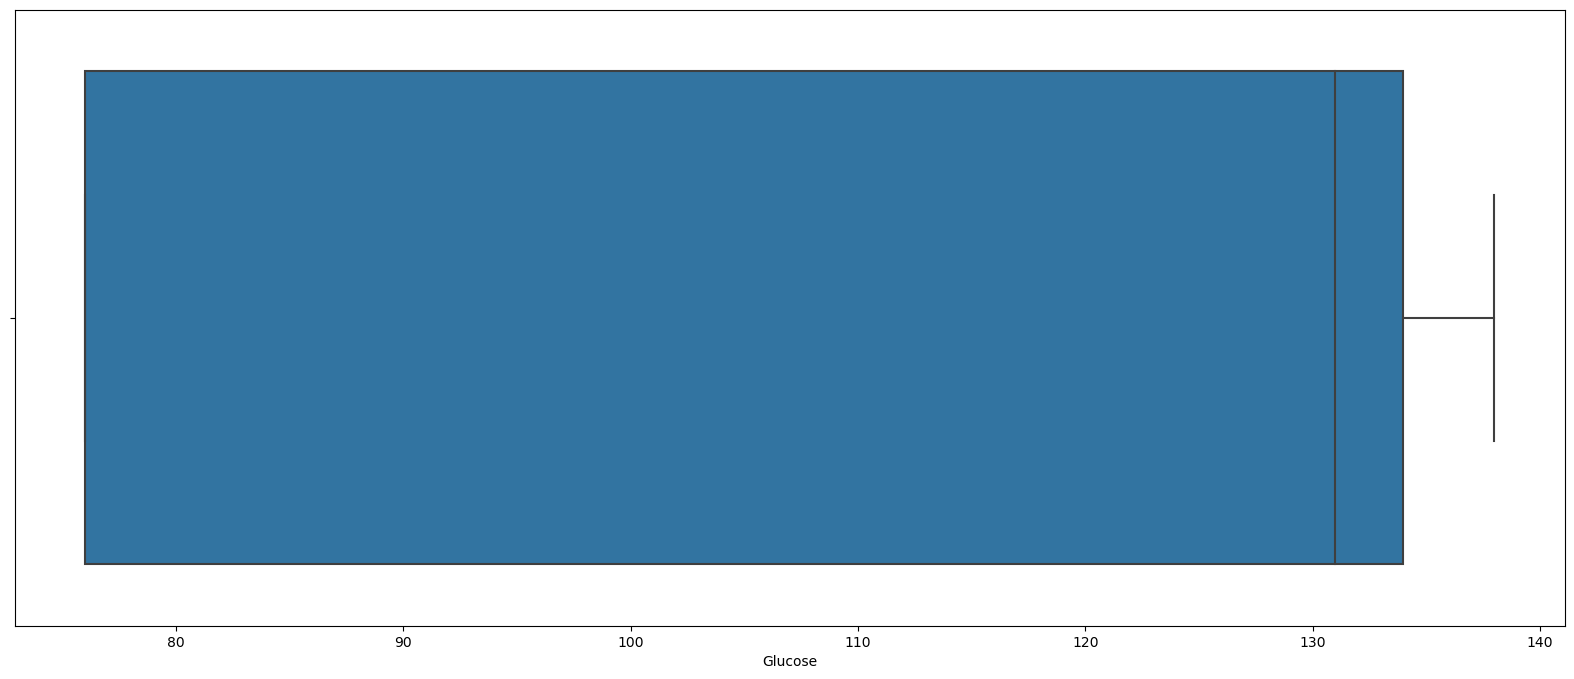

In [20]:
fig=plt.figure(figsize=(20,8))
sns.boxplot(x='Glucose',data=df)
plt.show()

 * Based on the above plots ,there are fewer or no outliers 

In [21]:
def plot_jointplot(column1:str,column2:str,hue=None,df=df):
    plt.figure(figsize=(20,8))
    sns.jointplot(x=column1,y=column2,hue=hue,data=df)
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title(f" A Jointplot showing the distribution of {column1} vs {column2}")
    plt.show()

<Figure size 2000x800 with 0 Axes>

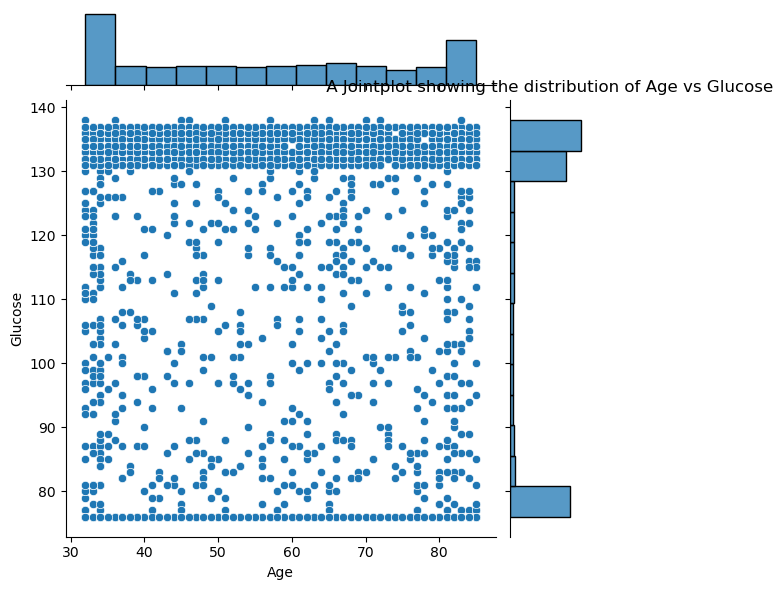

In [22]:
# Checking for the relationship between Age,bmi,glucose ,insulin
plot_jointplot('Age','Glucose')

<Figure size 2000x800 with 0 Axes>

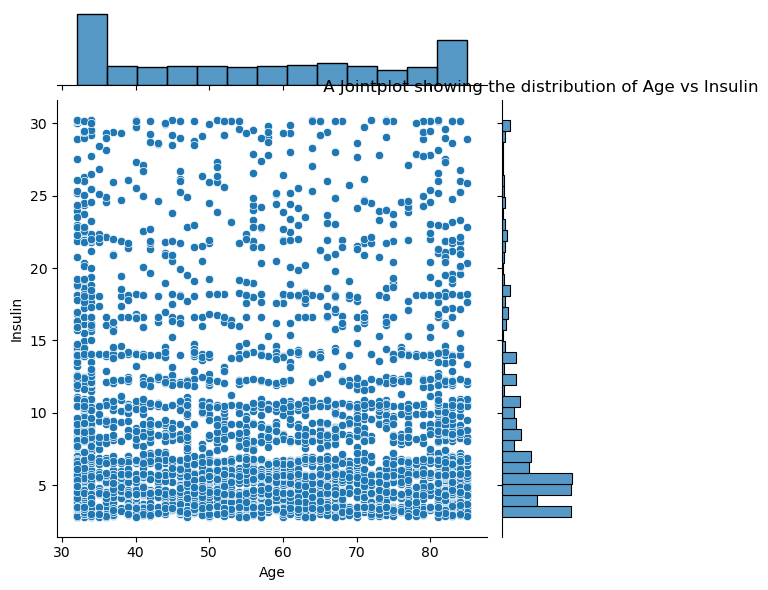

In [23]:
plot_jointplot('Age','Insulin')

<Figure size 2000x800 with 0 Axes>

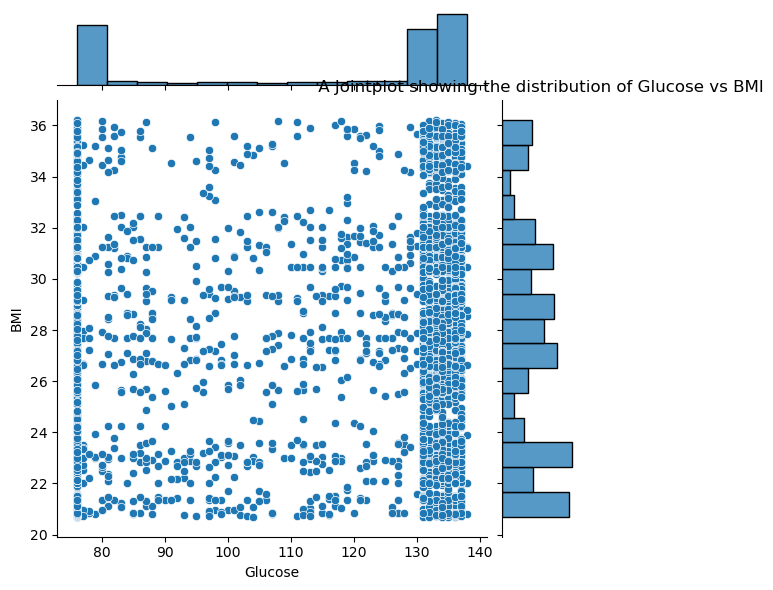

In [24]:
plot_jointplot('Glucose','BMI')

<Figure size 2000x800 with 0 Axes>

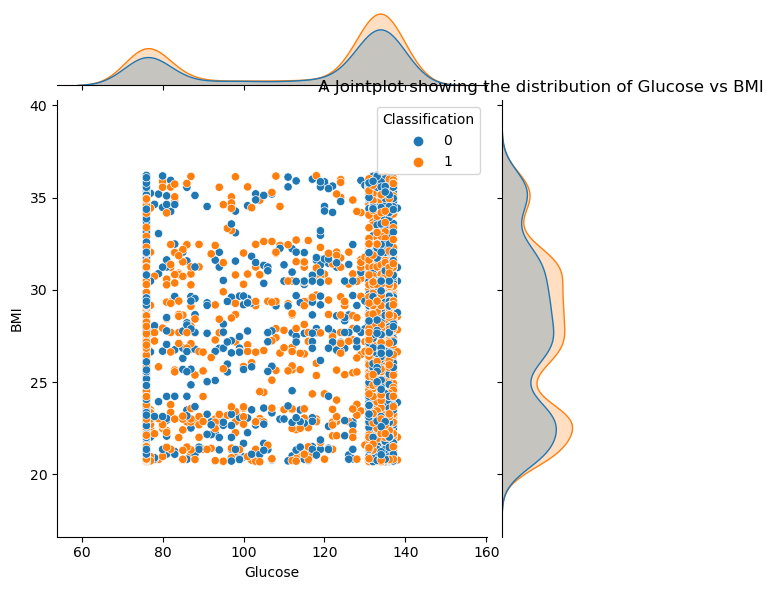

In [25]:
plot_jointplot('Glucose','BMI',hue='Classification')

<Figure size 2000x800 with 0 Axes>

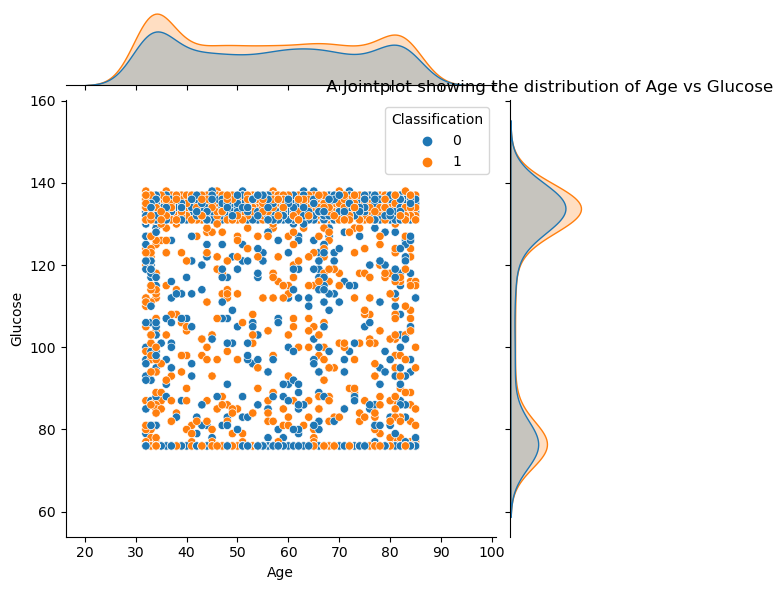

In [26]:
plot_jointplot('Age','Glucose',hue='Classification')

In [27]:
def plot_violin(column1:str,column2:str,hue=None,df=df):
    plt.figure(figsize=(20,8))
    sns.violinplot(x=column1,y=column2,hue=hue,data=df)
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title(f" A Jointplot showing the distribution of {column1} vs {column2}")
    plt.show()

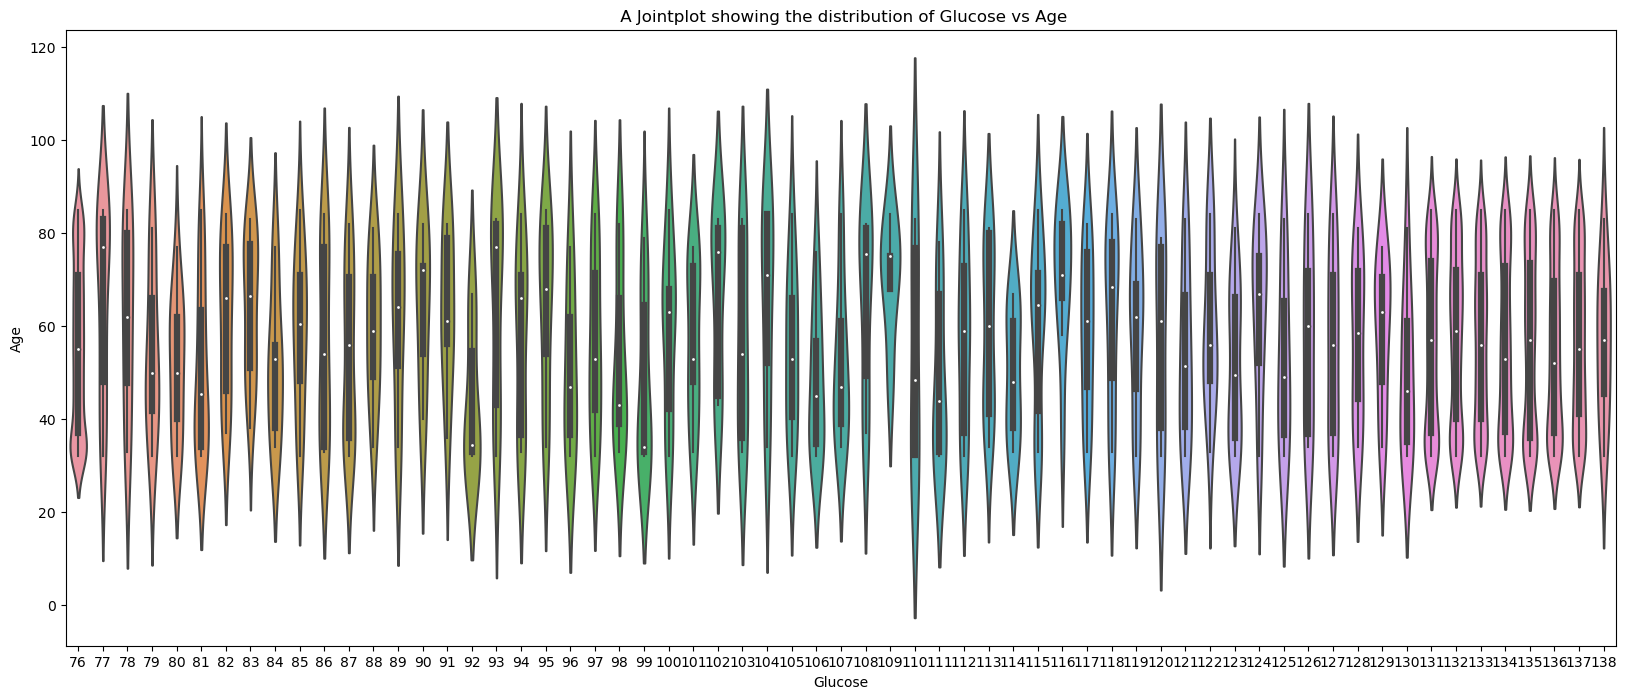

In [28]:
plot_violin('Glucose','Age')

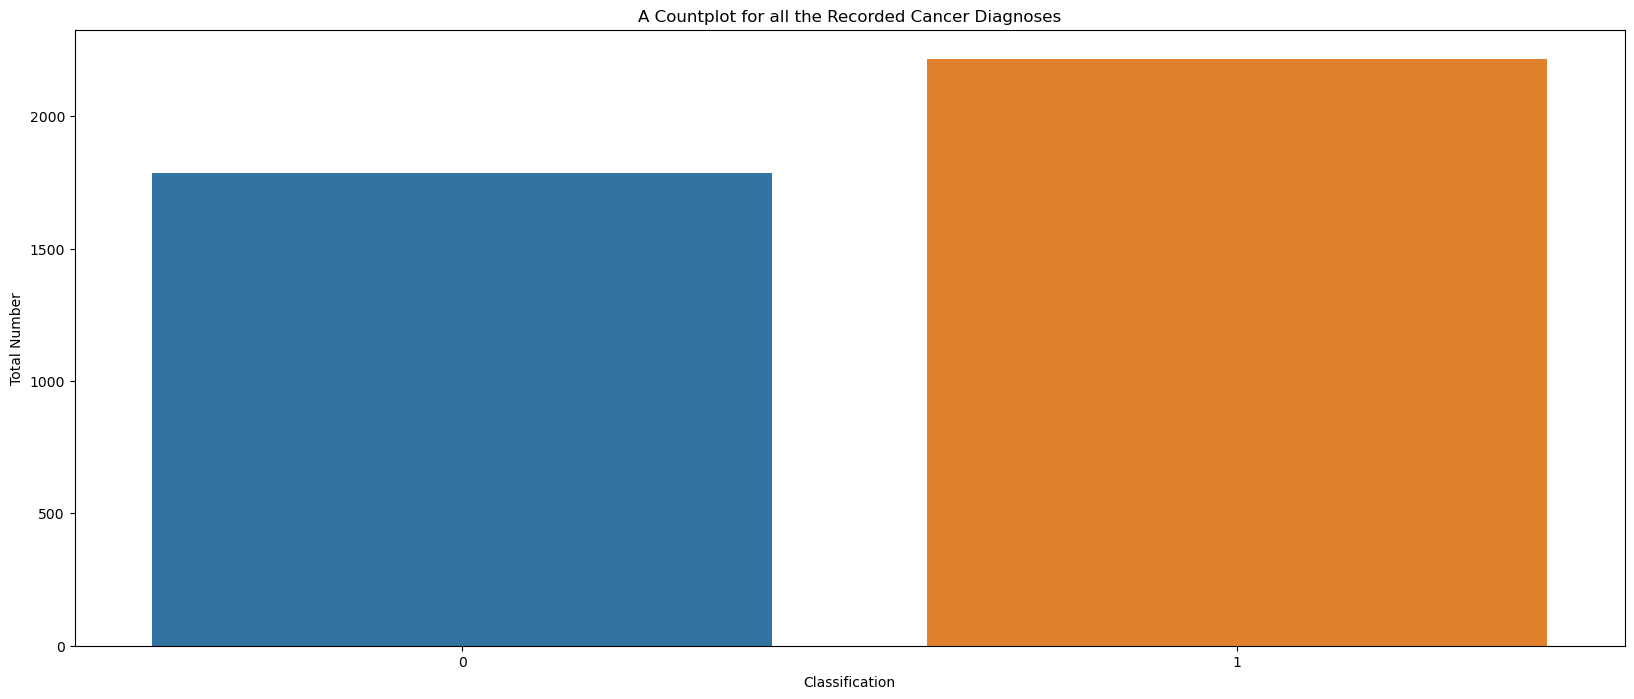

In [29]:
plt.figure(figsize=(20,8))
sns.countplot(x='Classification',data=df)
plt.ylabel("Total Number")
plt.title('A Countplot for all the Recorded Cancer Diagnoses')
plt.show()

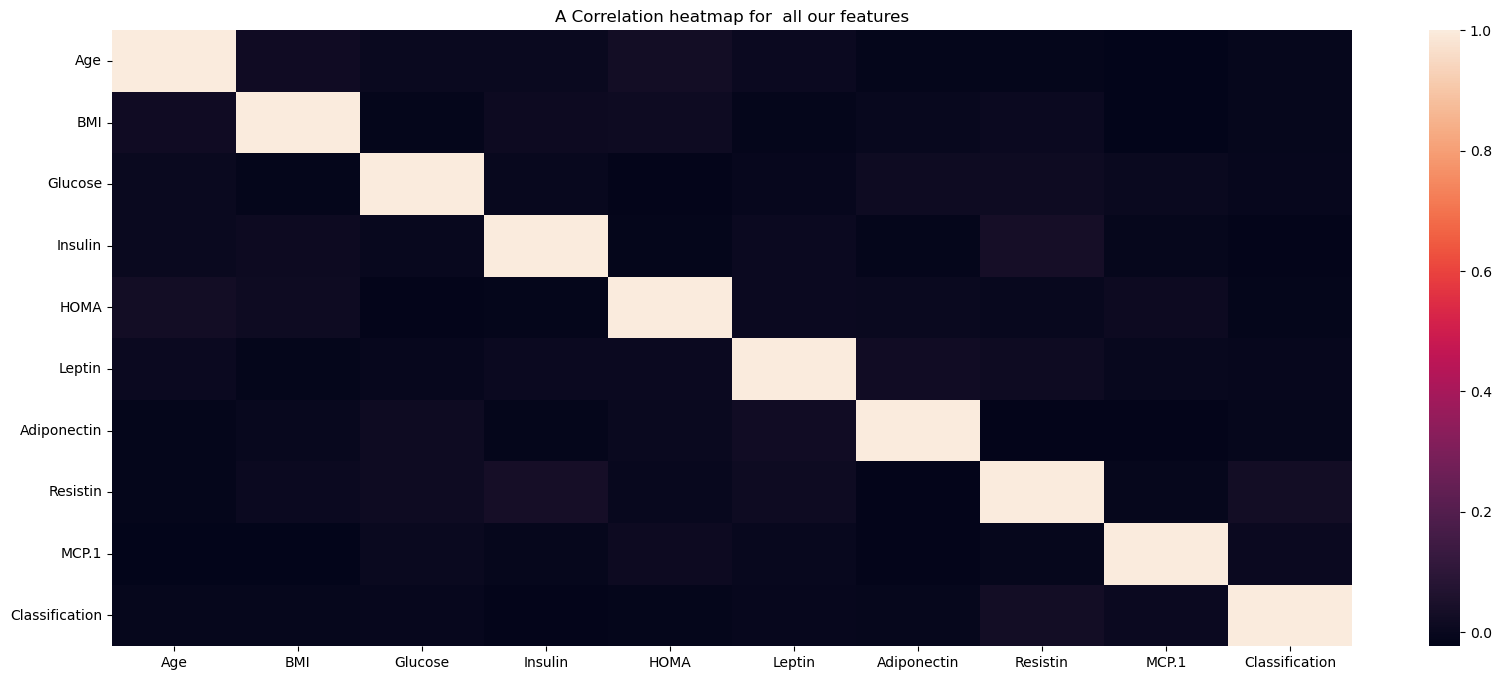

In [30]:
# Plotting a correlation heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df.corr())
plt.title("A Correlation heatmap for  all our features")
plt.show()

In [31]:
df.corr()

Age       BMI   Glucose   Insulin      HOMA    Leptin  \
Age             1.000000  0.019139  0.002611  0.000742  0.024631  0.005058   
BMI             0.019139  1.000000 -0.014469  0.011574  0.012795 -0.011482   
Glucose         0.002611 -0.014469  1.000000  0.000558 -0.018232 -0.006461   
Insulin         0.000742  0.011574  0.000558  1.000000 -0.013142  0.005678   
HOMA            0.024631  0.012795 -0.018232 -0.013142  1.000000  0.006751   
Leptin          0.005058 -0.011482 -0.006461  0.005678  0.006751  1.000000   
Adiponectin    -0.013493 -0.002348  0.016363 -0.014560  0.003433  0.024054   
Resistin       -0.013438  0.005303  0.014179  0.036136  0.000272  0.014217   
MCP.1          -0.019410 -0.023389  0.001837 -0.011382  0.009965 -0.003359   
Classification -0.007965 -0.009352 -0.004893 -0.016826 -0.012441 -0.004914   

                Adiponectin  Resistin     MCP.1  Classification  
Age               -0.013493 -0.013438 -0.019410       -0.007965  
BMI               -0.002348  0.005303 -0.023389       -0.009352  
Glucose            0.016363  0.014179  0.001837       -0.004893  
Insulin           -0.014560  0.036136 -0.011382       -0.016826  
HOMA               0.003433  0.000272  0.009965       -0.012441  
Leptin             0.024054  0.014217 -0.003359       -0.004914  
Adiponectin        1.000000 -0.018945 -0.018323       -0.007499  
Resistin          -0.018945  1.000000 -0.007602        0.026235  
MCP.1             -0.018323 -0.007602  1.000000        0.006002  
Classification    -0.007499  0.026235  0.006002        1.000000

**FINAL DATA PREPROCESSING**

In [55]:
from sklearn.model_selection import train_test_split
X = df.drop(['Classification'],axis=1).values
y = df['Classification'].values.reshape(-1,1)

In [56]:
scaler = StandardScaler() # scaling data before feeding to my model
X = scaler.fit_transform(X)

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=142,shuffle=True)

In [58]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [59]:
X_train.shape

torch.Size([3200, 9])

# PART 3 : DEEP LEARNING
**What I will do**
* Building a model(Linear Model)
* Training the Model
* Deploying the Model

**Building a Model**


In [102]:
torch.manual_seed(2024)
class BreastCancer(nn.Module):
    def __init__(self,input_dim=9,hidden_dim=36,output_dim=1,p=0.4):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output = output_dim
        self.linear1 = nn.Linear(input_dim,hidden_dim)
        self.linear2 = nn.Linear(hidden_dim,hidden_dim)
        self.linear3 = nn.Linear(hidden_dim,hidden_dim)
        self.linear4 = nn.Linear(hidden_dim,hidden_dim)
        self.dropout = nn.Dropout(p)
        self.fc= nn.Linear(hidden_dim,output_dim)
    def forward(self,x:torch.Tensor):
        x = self.dropout(x)
        x = torch.sigmoid(x)
        x = self.linear1(x)
        x = self.linear2(x)
        x = self.linear3(x)
        x = self.linear4(x)
        x = self.fc(x)
        x = torch.sigmoid(x)
        x = torch.round(x)
        return x

In [103]:
model = BreastCancer()

In [104]:
model

BreastCancer(
  (linear1): Linear(in_features=9, out_features=36, bias=True)
  (linear2): Linear(in_features=36, out_features=36, bias=True)
  (linear3): Linear(in_features=36, out_features=36, bias=True)
  (linear4): Linear(in_features=36, out_features=36, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
  (fc): Linear(in_features=36, out_features=1, bias=True)
)

In [105]:
with torch.no_grad():
    random_predictions = model.forward(X_train[:10])
print(random_predictions)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])



**TRAINING MY MODEL**

In [110]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)
loss_fn = nn.BCEWithLogitsLoss()
accuracy = torchmetrics.Accuracy(task='MULTICLASS',num_classes=2)

In [114]:
# training and testing loop
epochs = 100
for epoch in range(epochs):
    model.train()
    y_pred = model.forward(X_train)
    training_loss = loss_fn(y_train,y_pred)
    training_accuracy = accuracy(y_train,y_pred)*100
    optimizer.zero_grad()
    training_loss.backward()
    optimizer.step()
    with torch.no_grad():
        model.eval()
        y_pred = model.forward(X_test)
        testing_loss = loss_fn(y_pred,y_test)
        testing_accuracy = accuracy(y_test,y_pred)*100
        if epoch % 10 == 0:
            print(f"Epoch :{epoch}|training_loss{training_loss}|testing loss{testing_loss}|testing_accuracy{testing_accuracy}%")
    

Epoch :0|training_loss0.48136094212532043|testing loss0.7732617259025574|testing_accuracy54.000003814697266%
Epoch :10|training_loss0.48136094212532043|testing loss0.7732617259025574|testing_accuracy54.000003814697266%
Epoch :20|training_loss0.48136094212532043|testing loss0.7732617259025574|testing_accuracy54.000003814697266%
Epoch :30|training_loss0.48136094212532043|testing loss0.7732617259025574|testing_accuracy54.000003814697266%
Epoch :40|training_loss0.48136094212532043|testing loss0.7732617259025574|testing_accuracy54.000003814697266%
Epoch :50|training_loss0.48136094212532043|testing loss0.7732617259025574|testing_accuracy54.000003814697266%
Epoch :60|training_loss0.48136094212532043|testing loss0.7732617259025574|testing_accuracy54.000003814697266%
Epoch :70|training_loss0.48136094212532043|testing loss0.7732617259025574|testing_accuracy54.000003814697266%
Epoch :80|training_loss0.48136094212532043|testing loss0.7732617259025574|testing_accuracy54.000003814697266%
Epoch :90|t